# 01 Data preprocessing
Haetaan tiedot

In [ ]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

chronic_kidney_disease = fetch_ucirepo(id=336)

df = chronic_kidney_disease.data.original
df.replace('nan', np.nan, inplace=True)
df


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


Poistetaan turhat sarakkeet ja nimetään uudestaan lyhenteet käytetyistä sarakkeista


In [ ]:
df = df.drop(columns=['rbc', 'pc', 'pcc', 'ba', 'sc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'])
df.rename(columns={'bp':'Blood pressure', 'sg':'Specific gravity', 'al':'Albumin', 'su':'Sugar', 'bgr':'Blood glucose random', 'bu':'Blood urea', 'sod':'Sodium', 'pot':'Potassium', 'hemo':'Hemoglobin', 'pcv':'Packed cell volume', 'wbcc':'White blood cell count', 'rbcc':'Red blood cell count'}, inplace=True)
df

,age,Blood pressure,Specific gravity,Albumin,Sugar,Blood glucose random,Blood urea,Sodium,Potassium,Hemoglobin,Packed cell volume,White blood cell count,Red blood cell count,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,15.4,44.0,7800.0,5.2,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,NaN,NaN,11.3,38.0,6000.0,NaN,ckd
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,NaN,NaN,9.6,31.0,7500.0,NaN,ckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,11.2,32.0,6700.0,3.9,ckd
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,11.6,35.0,7300.0,4.6,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,15.7,47.0,6700.0,4.9,notckd
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,16.5,54.0,7800.0,6.2,notckd
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,15.8,49.0,6600.0,5.4,notckd
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,14.2,51.0,7200.0,5.9,notckd


Muutetaan hemoglobiini g/dl -> g/l

In [ ]:
df['Hemoglobin'] = df['Hemoglobin'] * 10
df['Hemoglobin']

0      154.0
1      113.0
2       96.0
3      112.0
4      116.0
       ...  
395    157.0
396    165.0
397    158.0
398    142.0
399    158.0
Name: Hemoglobin, Length: 400, dtype: float64

Muutetaan luokka sarakkeen arvot

In [ ]:

df['class'] = df['class'].map({'ckd': 'a', 'notckd': 'c'})
len(df)

400

Poistetaan rivit, joissa on 3 tai enemmän tyhjiä arvoja

In [ ]:
print('orginal lenght', len(df))
df = df[df.isna().sum(axis = 1) < 3]
print('new length', len(df))
df

orginal lenght 400
new length 265


,age,Blood pressure,Specific gravity,Albumin,Sugar,Blood glucose random,Blood urea,Sodium,Potassium,Hemoglobin,Packed cell volume,White blood cell count,Red blood cell count,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,154.0,44.0,7800.0,5.2,a
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,112.0,32.0,6700.0,3.9,a
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,116.0,35.0,7300.0,4.6,a
5,60.0,90.0,1.015,3.0,0.0,74.0,25.0,142.0,3.2,122.0,39.0,7800.0,4.4,a
6,68.0,70.0,1.010,0.0,0.0,100.0,54.0,104.0,4.0,124.0,36.0,NaN,NaN,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,157.0,47.0,6700.0,4.9,c
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,165.0,54.0,7800.0,6.2,c
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,158.0,49.0,6600.0,5.4,c
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,142.0,51.0,7200.0,5.9,c


# Dataframes

In [ ]:
affected = df[df['class'] == 'a']
control = df[df['class'] == 'c']
control

,age,Blood pressure,Specific gravity,Albumin,Sugar,Blood glucose random,Blood urea,Sodium,Potassium,Hemoglobin,Packed cell volume,White blood cell count,Red blood cell count,class
250,40.0,80.0,1.025,0.0,0.0,140.0,10.0,135.0,5.0,150.0,48.0,10400.0,4.5,c
251,23.0,80.0,1.025,0.0,0.0,70.0,36.0,150.0,4.6,170.0,52.0,9800.0,5.0,c
252,45.0,80.0,1.025,0.0,0.0,82.0,49.0,147.0,4.4,159.0,46.0,9100.0,4.7,c
253,57.0,80.0,1.025,0.0,0.0,119.0,17.0,135.0,4.7,154.0,42.0,6200.0,6.2,c
254,51.0,60.0,1.025,0.0,0.0,99.0,38.0,135.0,3.7,130.0,49.0,8300.0,5.2,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,157.0,47.0,6700.0,4.9,c
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,165.0,54.0,7800.0,6.2,c
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,158.0,49.0,6600.0,5.4,c
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,142.0,51.0,7200.0,5.9,c


In [ ]:
affected

,age,Blood pressure,Specific gravity,Albumin,Sugar,Blood glucose random,Blood urea,Sodium,Potassium,Hemoglobin,Packed cell volume,White blood cell count,Red blood cell count,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,154.0,44.0,7800.0,5.2,a
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,112.0,32.0,6700.0,3.9,a
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,116.0,35.0,7300.0,4.6,a
5,60.0,90.0,1.015,3.0,0.0,74.0,25.0,142.0,3.2,122.0,39.0,7800.0,4.4,a
6,68.0,70.0,1.010,0.0,0.0,100.0,54.0,104.0,4.0,124.0,36.0,NaN,NaN,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,62.0,90.0,1.020,2.0,1.0,169.0,48.0,138.0,2.9,134.0,47.0,11000.0,6.1,a
244,64.0,90.0,1.015,3.0,2.0,463.0,64.0,135.0,4.1,122.0,40.0,9800.0,4.6,a
246,48.0,110.0,1.015,3.0,0.0,106.0,215.0,120.0,5.7,86.0,26.0,5000.0,2.5,a
248,59.0,70.0,1.010,1.0,3.0,424.0,55.0,138.0,4.5,126.0,37.0,10200.0,4.1,a


In [ ]:
print('affected rows:', len(affected), 'control rows:', len(control))

affected rows: 126 control rows: 139


# Perusarvoja

In [ ]:
affected.describe()

,age,Blood pressure,Specific gravity,Albumin,Sugar,Blood glucose random,Blood urea,Sodium,Potassium,Hemoglobin,Packed cell volume,White blood cell count,Red blood cell count
count,123.000000,125.000000,125.000000,126.000000,126.000000,120.000000,125.000000,108.000000,108.000000,125.000000,125.000000,113.000000,108.000000
mean,57.081301,80.720000,1.013560,1.849206,0.809524,181.200000,80.420000,133.731481,4.751852,106.432000,32.440000,9450.442478,3.976852
std,14.465104,15.769305,0.004527,1.437038,1.366539,93.549394,60.501346,7.666661,4.203592,21.896507,7.150908,3720.458015,0.844510
min,6.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,104.000000,2.500000,31.000000,9.000000,2600.000000,2.100000
25%,49.500000,70.000000,1.010000,0.250000,0.000000,107.000000,37.000000,131.750000,3.800000,95.000000,29.000000,7100.000000,3.400000
50%,60.000000,80.000000,1.015000,2.000000,0.000000,158.000000,60.000000,136.000000,4.200000,108.000000,33.000000,9200.000000,3.900000
75%,65.000000,90.000000,1.015000,3.000000,1.000000,241.250000,107.000000,139.000000,4.900000,120.000000,37.000000,11000.000000,4.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,322.000000,145.000000,47.000000,161.000000,52.000000,26400.000000,8.000000


In [ ]:
control.describe()

,age,Blood pressure,Specific gravity,Albumin,Sugar,Blood glucose random,Blood urea,Sodium,Potassium,Hemoglobin,Packed cell volume,White blood cell count,Red blood cell count
count,139.000000,137.000000,139.000000,139.0,139.0,135.000000,135.000000,136.000000,136.000000,137.000000,138.000000,136.000000,136.000000
mean,46.568345,71.313869,1.022482,0.0,0.0,107.385185,32.874074,141.735294,4.335294,151.883212,46.246377,7708.088235,5.380882
std,15.903719,8.559267,0.002509,0.0,0.0,18.747730,11.482257,4.792332,0.596351,12.845270,4.107695,1815.164727,0.592986
min,12.000000,60.000000,1.020000,0.0,0.0,70.000000,10.000000,135.000000,3.300000,130.000000,40.000000,4300.000000,4.500000
25%,34.000000,60.000000,1.020000,0.0,0.0,93.000000,23.500000,138.000000,3.700000,141.000000,43.000000,6300.000000,4.900000
50%,46.000000,70.000000,1.020000,0.0,0.0,107.000000,33.000000,141.000000,4.500000,150.000000,46.000000,7450.000000,5.300000
75%,58.000000,80.000000,1.025000,0.0,0.0,123.500000,44.000000,146.000000,4.900000,162.000000,50.000000,9225.000000,5.900000
max,80.000000,80.000000,1.025000,0.0,0.0,140.000000,50.000000,150.000000,5.000000,178.000000,54.000000,11000.000000,6.500000


# Histogram

Affected

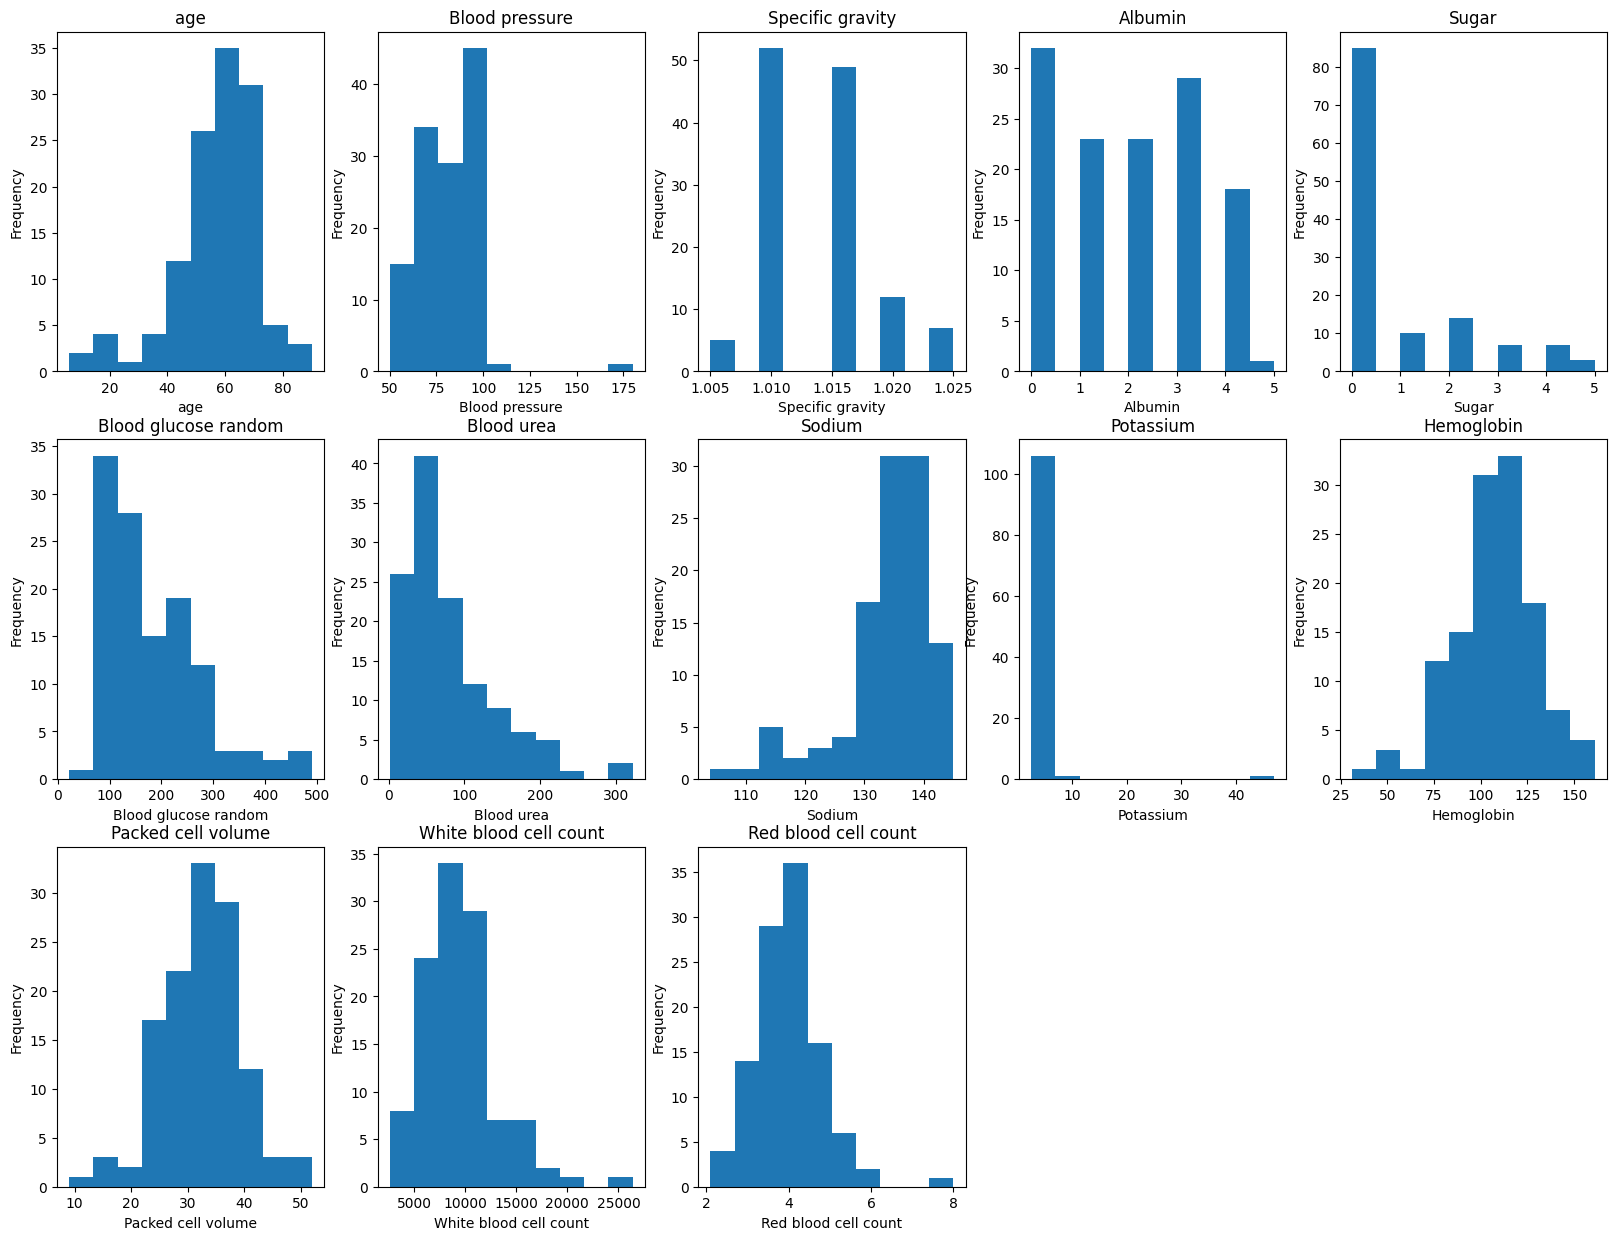

In [ ]:
def plot_data(df):
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(df.select_dtypes(include=['int', 'float']).columns):
        plt.subplot(3,5, i + 1)
        df[col].plot(kind='hist', title=col)
        plt.xlabel(col)
plot_data(affected)

Control

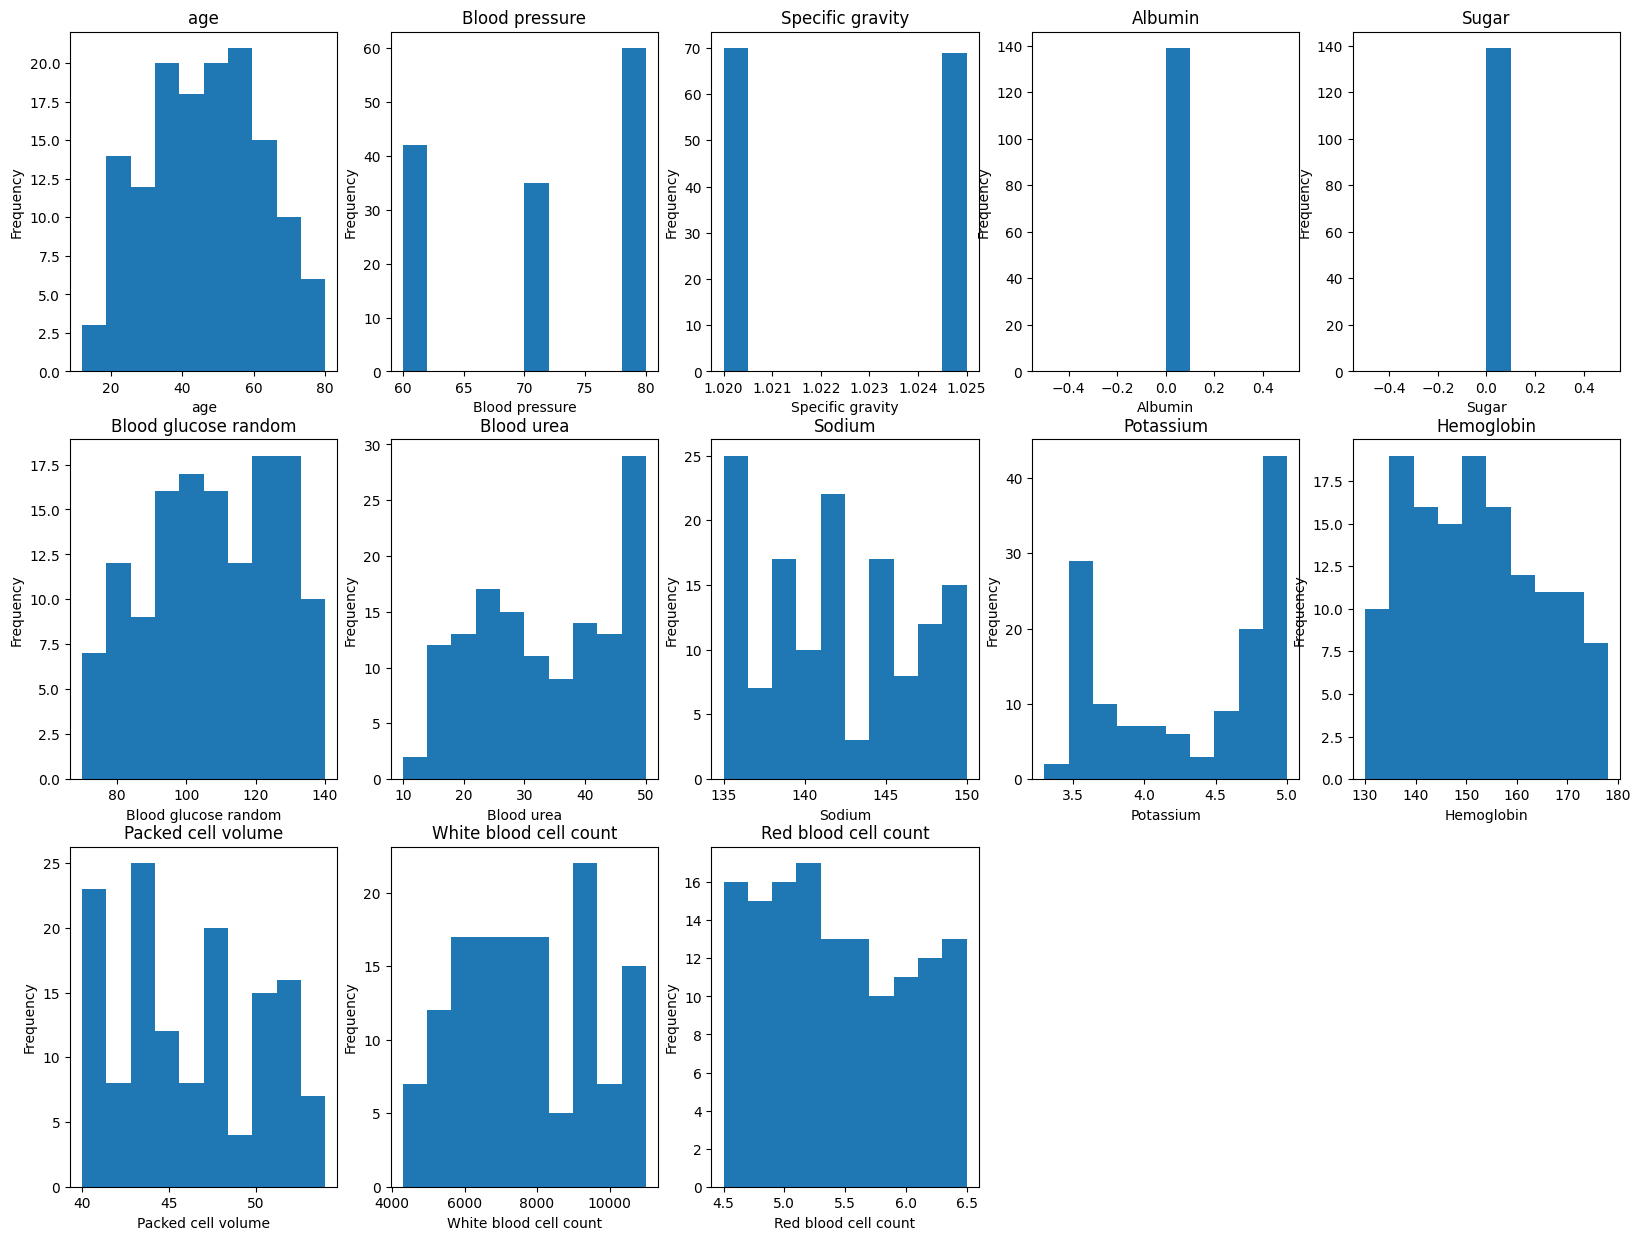

In [ ]:
plot_data(control)

# Yksittäiset suuret poikkeamat arvoissa

affected taulussa potassium arvo näyttää olevan väärin merkitty kummankin taulun perusteella

In [ ]:
print('Max potassium in affected:', affected['Potassium'].max(), 'Max potassium in control:', control['Potassium'].max())

Max potassium in affected: 47.0 Max potassium in control: 5.0


In [ ]:
df = df[df['Potassium'] < 20]

Myös Affected White blood cell count maksimi on todella suuri verrattuna normaaliin

In [ ]:
print('Max white blood cell count in affected:', affected['White blood cell count'].max(), 'Max white blood cell count in control:', control['White blood cell count'].max())

Max white blood cell count in affected: 26400.0 Max white blood cell count in control: 11000.0


In [ ]:
df = df[df['White blood cell count'] < 23000.0]

Sama verenpaineen suhteen

In [ ]:
print('Max blood pressure in affected:', affected['Blood pressure'].max(), 'Max blood pressure in control:', control['Blood pressure'].max())

Max blood pressure in affected: 180.0 Max blood pressure in control: 80.0


In [ ]:
df = df[df['Blood pressure'] < 180]

Sekä blood urean kanssa

In [ ]:
print('Max blood urea in affected:', affected['Blood urea'].max(), 'Max blood urea in control:', control['Blood urea'].max())

Max blood urea in affected: 322.0 Max blood urea in control: 50.0


In [ ]:
df = df[df['Blood urea'] < 300.0]

In [ ]:
affected = df[df['class'] == 'a']
control = df[df['class'] == 'c']

# Korjattu histogrammi

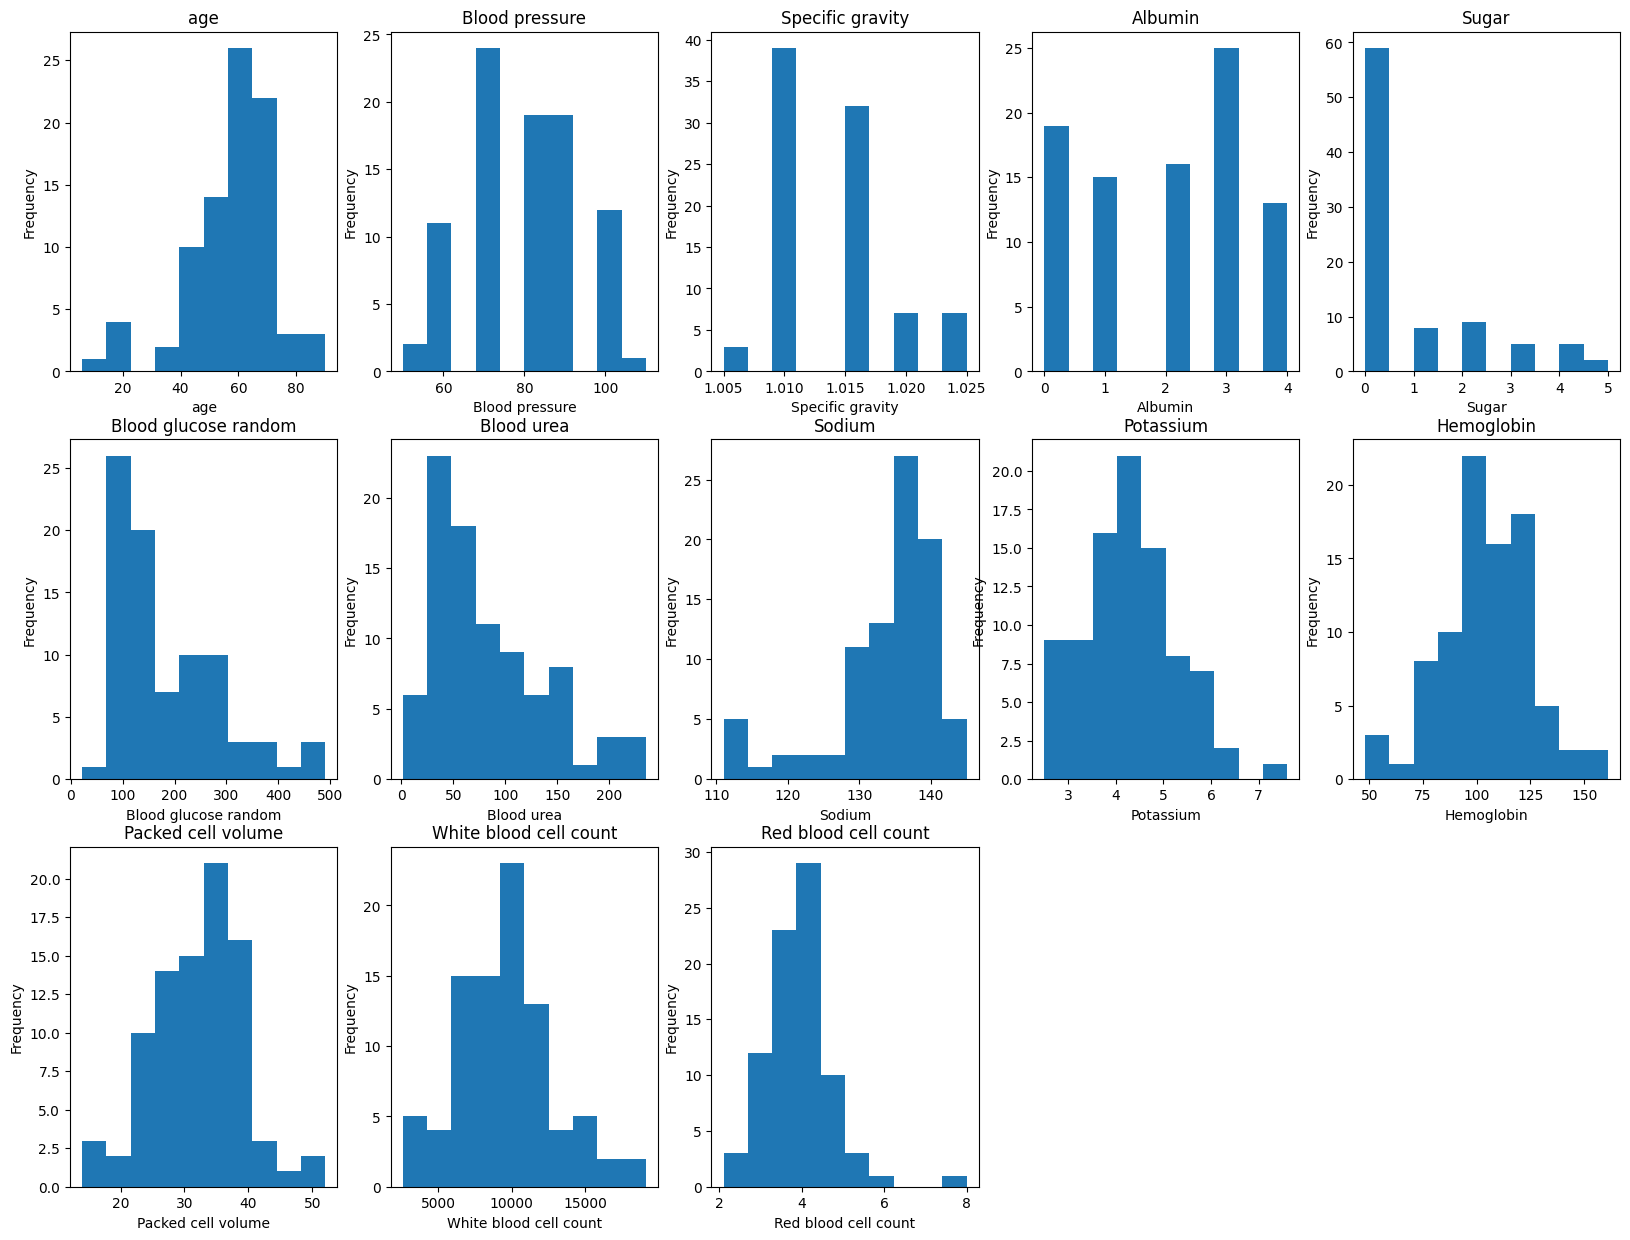

In [ ]:
plot_data(affected)

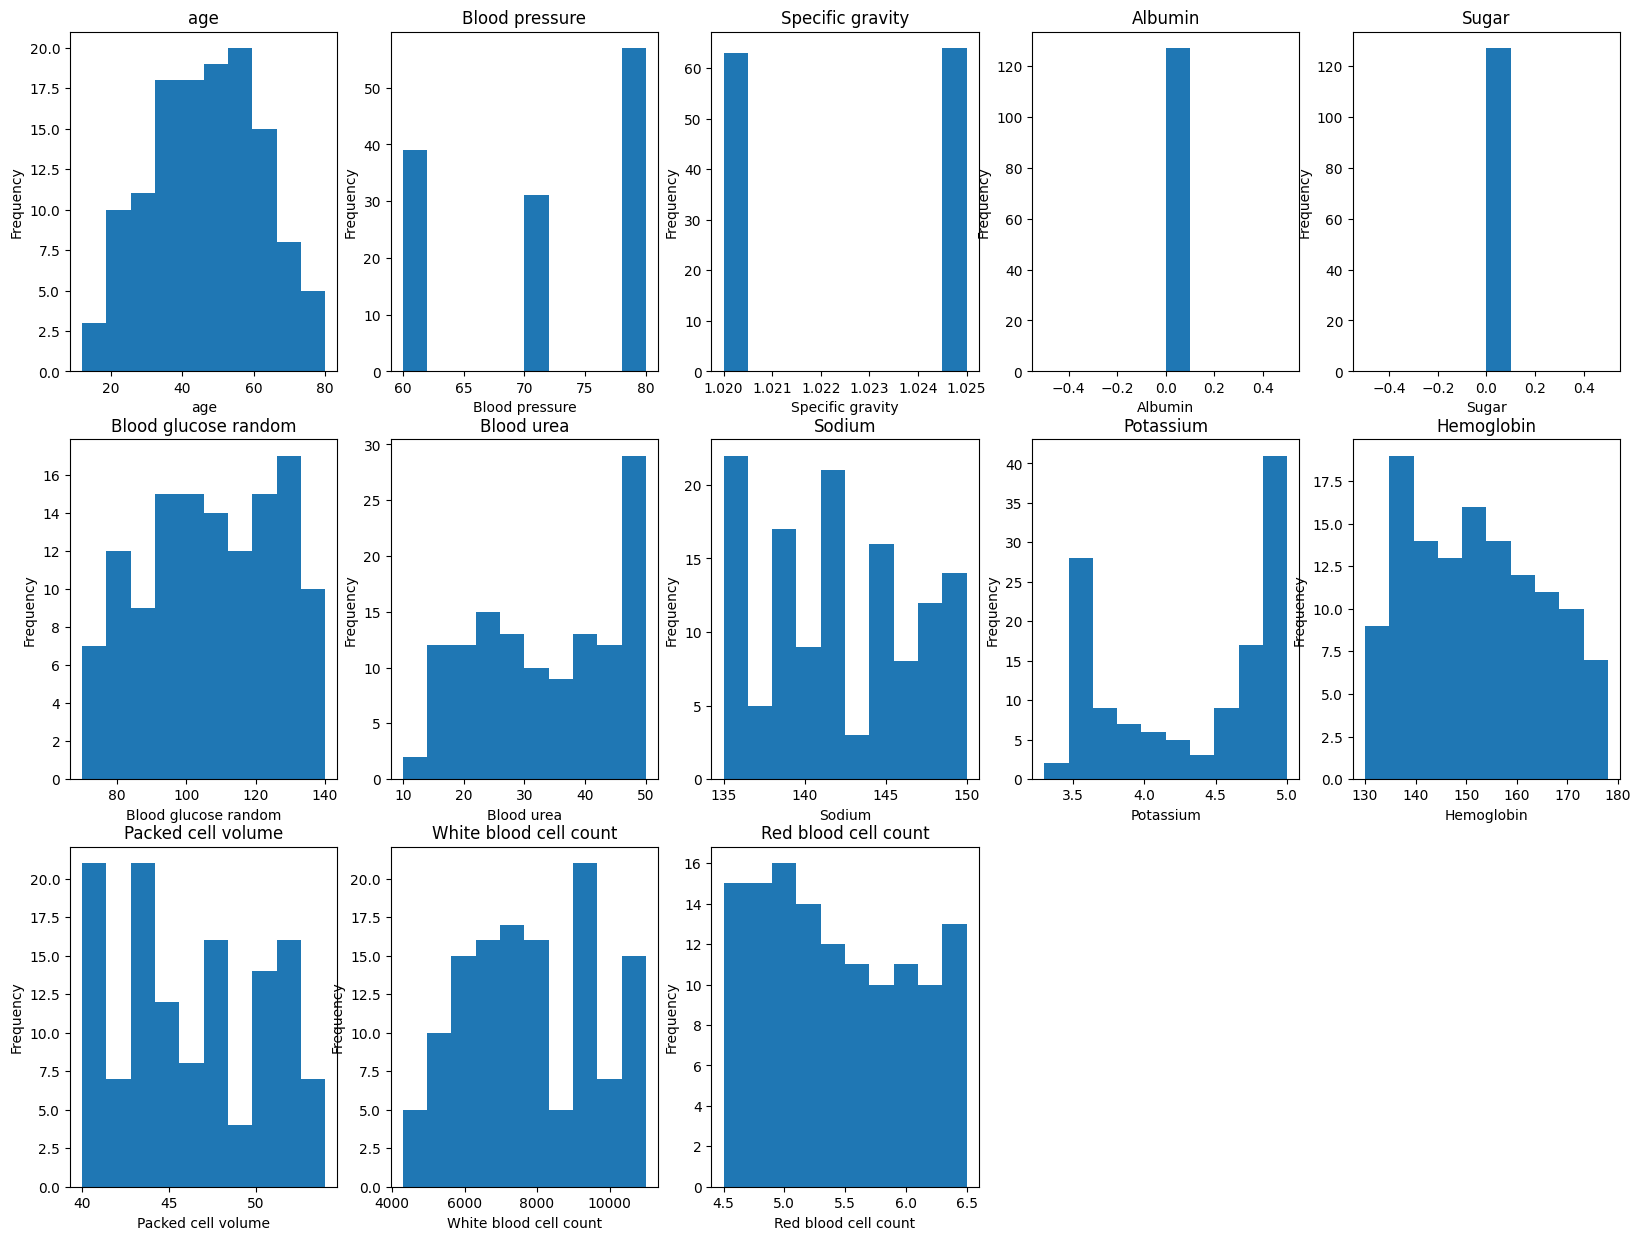

In [ ]:
plot_data(control)

# Correlation matrix

In [ ]:
affected_correlation = affected.corr(numeric_only=True)
control_correlation = control.corr(numeric_only=True)
affected_correlation

,age,Blood pressure,Specific gravity,Albumin,Sugar,Blood glucose random,Blood urea,Sodium,Potassium,Hemoglobin,Packed cell volume,White blood cell count,Red blood cell count
age,1.000000,0.114857,0.000240,-0.080602,0.218190,0.233576,-0.044540,0.005361,0.105324,0.112982,0.045168,0.008520,0.102563
Blood pressure,0.114857,1.000000,0.109113,0.011312,0.091807,-0.015970,0.116861,0.107160,0.060653,-0.098852,-0.067084,-0.099969,0.177816
Specific gravity,0.000240,0.109113,1.000000,-0.073974,-0.085011,-0.160583,0.013487,0.144353,0.124880,0.079736,0.078939,-0.083814,0.098887
Albumin,-0.080602,0.011312,-0.073974,1.000000,0.125078,0.067597,0.302299,-0.256790,0.120635,-0.242198,-0.189753,0.000738,-0.077362
Sugar,0.218190,0.091807,-0.085011,0.125078,1.000000,0.729246,-0.053148,-0.016877,-0.011853,0.234811,0.143945,0.122037,0.111958
Blood glucose random,0.233576,-0.015970,-0.160583,0.067597,0.729246,1.000000,-0.049368,-0.111519,-0.118849,0.199138,0.138482,0.006341,0.158371
Blood urea,-0.044540,0.116861,0.013487,0.302299,-0.053148,-0.049368,1.000000,-0.327672,0.285789,-0.545836,-0.524730,-0.103586,-0.415259
Sodium,0.005361,0.107160,0.144353,-0.256790,-0.016877,-0.111519,-0.327672,1.000000,0.060342,0.340469,0.343416,-0.044382,0.245964
Potassium,0.105324,0.060653,0.124880,0.120635,-0.011853,-0.118849,0.285789,0.060342,1.000000,-0.317351,-0.334053,-0.224761,-0.269555
Hemoglobin,0.112982,-0.098852,0.079736,-0.242198,0.234811,0.199138,-0.545836,0.340469,-0.317351,1.000000,0.952131,0.074182,0.716155


In [ ]:
control_correlation

,age,Blood pressure,Specific gravity,Albumin,Sugar,Blood glucose random,Blood urea,Sodium,Potassium,Hemoglobin,Packed cell volume,White blood cell count,Red blood cell count
age,1.000000,-0.078939,-0.116265,NaN,NaN,0.141875,0.066669,0.112493,-0.106474,0.007423,-0.053651,0.134264,-0.093776
Blood pressure,-0.078939,1.000000,0.090495,NaN,NaN,0.009551,-0.090697,-0.118305,-0.040194,0.146464,-0.031993,-0.099870,-0.014063
Specific gravity,-0.116265,0.090495,1.000000,NaN,NaN,-0.048391,-0.069535,-0.013123,0.103406,0.033738,0.031107,-0.028781,0.096280
Albumin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sugar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blood glucose random,0.141875,0.009551,-0.048391,NaN,NaN,1.000000,-0.075308,0.008507,0.167440,-0.137950,-0.249689,-0.086881,-0.190736
Blood urea,0.066669,-0.090697,-0.069535,NaN,NaN,-0.075308,1.000000,0.005143,0.041615,0.073001,0.113930,0.028464,-0.005412
Sodium,0.112493,-0.118305,-0.013123,NaN,NaN,0.008507,0.005143,1.000000,0.046641,-0.021246,-0.028496,0.335862,-0.099713
Potassium,-0.106474,-0.040194,0.103406,NaN,NaN,0.167440,0.041615,0.046641,1.000000,0.101379,-0.187394,0.059235,-0.067168
Hemoglobin,0.007423,0.146464,0.033738,NaN,NaN,-0.137950,0.073001,-0.021246,0.101379,1.000000,0.041599,-0.195760,0.073498


# Heatmap

In [ ]:
def heatmap(correlation_matrix):
    plt.figure(figsize=(10, 10))
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
    plt.colorbar()
    plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
    plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
    plt.show()

Affected


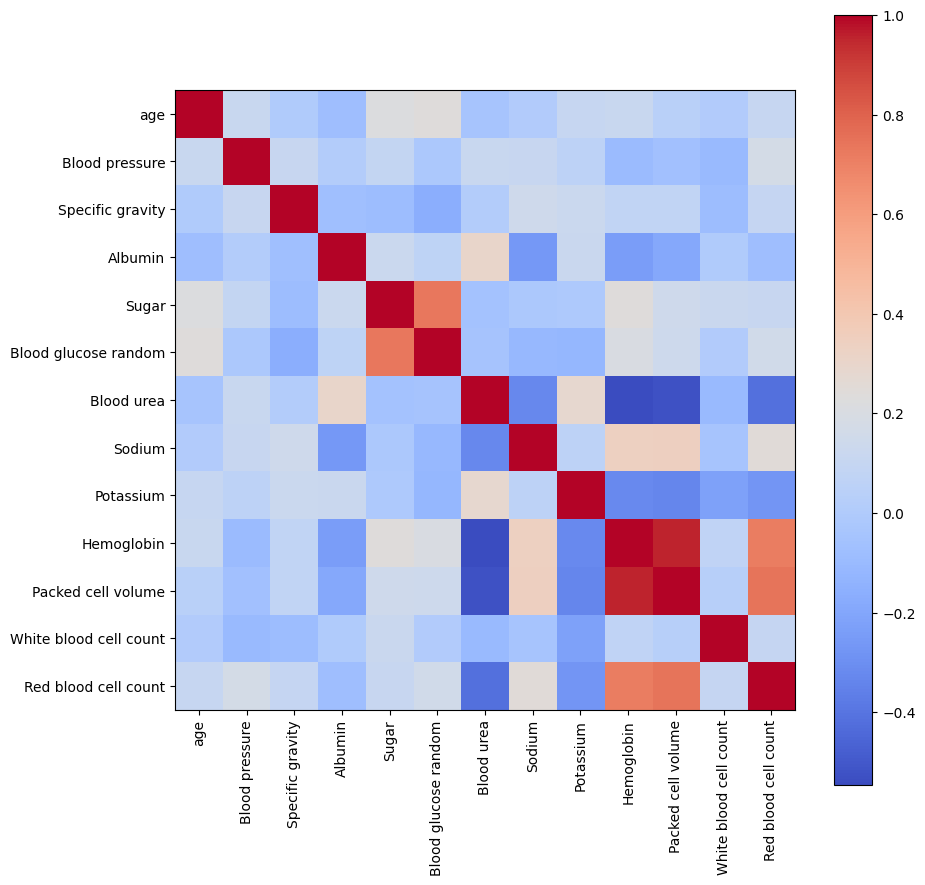

In [ ]:
heatmap(affected_correlation)

Control


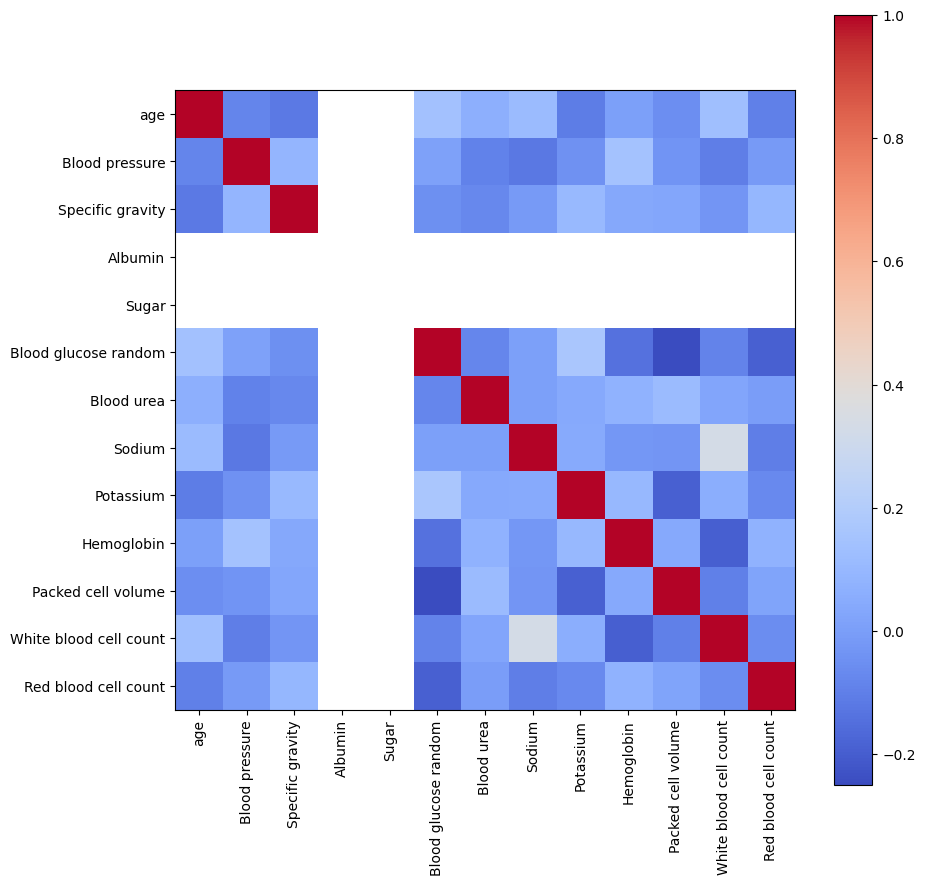

In [ ]:
heatmap(control_correlation)